## Homework 1

#### 請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

3. 蒐集而來的資料型態為何

4. 這組資料想解決的問題如何評估

1) 我找的是遊戲銷售量的紀錄[here](https://www.kaggle.com/gregorut/videogamesales)，我很好奇賣座的遊戲類型，是否會隨著時代的不同而有所改變。

2) 資料來源為VGChartz，但VGChartz的遊戲銷售量是用推測的，根據他們官網的[技術聲明稿](http://www.vgchartz.com/article/629/where-do-vg-chartz-north-american-numbers-come-from/)，他們無法釋出演算法，但他們主要是透過零售商的數據推廣到全地區的數據，因此熱門的遊戲會有比較高的可信度。

3) 資料型態為結構化的表格，Kaggle提供的是到2016/10/26的收集結果，因此我使用Kaggle提供的爬蟲程式，更新到2019/4/16的資料。

4) 而最終目的是找到一個符合現在趨勢的遊戲類型，由於遊戲類型是離散的，為一個分類問題，使用cross entropy。

In [60]:
import numpy as np
import pandas as pd


MyFile = '../data/vgsales_2019.csv'
if ( os.path.isfile(MyFile) ):

        df = pd.read_csv(MyFile)
        print(df.head())


   Rank                           Name Platform    Year     Genre  \
0     1                     Wii Sports      Wii  2006.0    Sports   
1     2              Super Mario Bros.      NES  1985.0  Platform   
2     3                 Mario Kart Wii      Wii  2008.0    Racing   
3     4  PlayerUnknown's Battlegrounds       PC  2017.0   Shooter   
4     5              Wii Sports Resort      Wii  2009.0    Sports   

            Publisher           Developer  Critic_Score  User_Score  NA_Sales  \
0          Nintendo        Nintendo EAD             7.7         NaN     41.36   
1          Nintendo        Nintendo EAD            10.0         8.2     29.08   
2          Nintendo        Nintendo EAD             8.2         9.1     15.91   
3  PUBG Corporation    PUBG Corporation             NaN         NaN       NaN   
4          Nintendo        Nintendo EAD             8.0         8.8     15.61   

   PAL_Sales  JP_Sales  Other_Sales  Global_Sales  
0      29.02      3.77         8.51         82

## Homework 2

#### 想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

3. 蒐集而來的資料型態為何

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

1) 面對現在的大環境競爭，我認為提升服務品質是提升業績的主要關鍵，並提升能見度、塑造品牌形象，增加消費者的信賴感。

2) 首先，根據乘客上、下車的地點，分析乘客的喜好並精準投放到相關的地方或網站。接著建立自家APP，提供叫車服務與乘客搭乘意見問卷，設立紅利吸引問卷的填答，並根據問卷增進車隊品質。並分析搭車的熱門地段，設立駐點站，吸引新客源，且根據熱門程度決定駐點的車數，達到開源節流。

3) 結構化的資料型態，根據熱門地點預測駐車數量。根據乘客回饋，標記不良的司機。

4) 根據業績調整駐車參數。

## Homework 3
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

$ MAR = \frac{1}{n}\sum_{i=1}^{n}{|Y_i - \hat{Y}_i|} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def mean_squared_error(y, y_hat):
    
    n = len(y)
    mse = 1/n * ( (y - y_hat)**2 ).sum()
    
    return mse

def mean_absolute_error(y, y_hat):
    
    n = len(y)
    mae = 1/n * ( np.abs(y - y_hat) ).sum()
    
    return mae

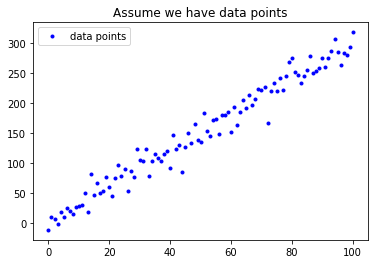

In [11]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

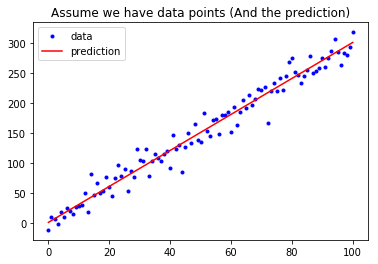

In [12]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [20]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 252.961
The Mean absolute error is 12.026


In [59]:
# https://github.com/GregorUT/vgchartzScrape
from bs4 import BeautifulSoup, element
import urllib
import pandas as pd
import numpy as np
import time

pages = 19
rec_count = 0
total_game = 500
rank = []
gname = []
platform = []
year = []
genre = []
critic_score = []
user_score = []
publisher = []
developer = []
sales_na = []
sales_pal = []
sales_jp = []
sales_ot = []
sales_gl = []

urlhead = 'http://www.vgchartz.com/gamedb/?page='
urltail = '&console=&region=All&developer=&publisher=&genre=&boxart=Both&ownership=Both'
urltail += '&results=1000&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0'
urltail += '&showpublisher=1&showvgchartzscore=0&shownasales=1&showdeveloper=1&showcriticscore=1'
urltail += '&showpalsales=0&showpalsales=1&showreleasedate=1&showuserscore=1&showjapansales=1'
urltail += '&showlastupdate=0&showothersales=1&showgenre=1&sort=GL'

for page in range(1, pages):
        
    if (rec_count >= total_game):
        break
    
    surl = urlhead + str(page) + urltail
    r = urllib.request.urlopen(surl).read()
    soup = BeautifulSoup(r)
    print(f"Page: {page}")

    # vgchartz website is really weird so we have to search for
    # <a> tags with game urls
    game_tags = list(filter(
        lambda x: x.attrs['href'].startswith('http://www.vgchartz.com/game/'),
        # discard the first 10 elements because those
        # links are in the navigation bar
        soup.find_all("a")
    ))[10:]

    
    for tag in game_tags:

        # add name to list
        gname.append(" ".join(tag.string.split()))
        print(f"{rec_count + 1} Fetch data for game {gname[-1]}")

        # get different attributes
        # traverse up the DOM tree
        data = tag.parent.parent.find_all("td")
        rank.append(np.int32(data[0].string))
        platform.append(data[3].find('img').attrs['alt'])
        publisher.append(data[4].string)
        developer.append(data[5].string)
        critic_score.append(
            float(data[6].string) if
            not data[6].string.startswith("N/A") else np.nan)
        user_score.append(
            float(data[7].string) if
            not data[7].string.startswith("N/A") else np.nan)
        sales_na.append(
            float(data[9].string[:-1]) if
            not data[9].string.startswith("N/A") else np.nan)
        sales_pal.append(
            float(data[10].string[:-1]) if
            not data[10].string.startswith("N/A") else np.nan)
        sales_jp.append(
            float(data[11].string[:-1]) if
            not data[11].string.startswith("N/A") else np.nan)
        sales_ot.append(
            float(data[12].string[:-1]) if
            not data[12].string.startswith("N/A") else np.nan)
        sales_gl.append(
            float(data[8].string[:-1]) if
            not data[8].string.startswith("N/A") else np.nan)
        release_year = data[13].string.split()[-1]
        # different format for year
        if release_year.startswith('N/A'):
            year.append('N/A')
        else:
            if int(release_year) >= 80:
                year_to_add = np.int32("19" + release_year)
            else:
                year_to_add = np.int32("20" + release_year)
            year.append(year_to_add)

        # go to every individual website to get genre info
        url_to_game = tag.attrs['href']
        site_raw = urllib.request.urlopen(url_to_game).read()
        sub_soup = BeautifulSoup(site_raw, "html.parser")
        # again, the info box is inconsistent among games so we
        # have to find all the h2 and traverse from that to the genre name
        h2s = sub_soup.find("div", {"id": "gameGenInfoBox"}).find_all('h2')
        # make a temporary tag here to search for the one that contains
        # the word "Genre"
        temp_tag = element.Tag
        for h2 in h2s:
            if h2.string == 'Genre':
                temp_tag = h2
        genre.append(temp_tag.next_sibling.string)

        rec_count += 1
        
        time.sleep(30) # avoid HTTP 429 problem
        
        if (rec_count >= total_game):
            break
        else:
            time.sleep(30) # avoid HTTP 429 problem

columns = {
    'Rank': rank,
    'Name': gname,
    'Platform': platform,
    'Year': year,
    'Genre': genre,
    'Critic_Score': critic_score,
    'User_Score': user_score,
    'Publisher': publisher,
    'Developer': developer,
    'NA_Sales': sales_na,
    'PAL_Sales': sales_pal,
    'JP_Sales': sales_jp,
    'Other_Sales': sales_ot,
    'Global_Sales': sales_gl
}

df = pd.DataFrame(columns)
print(df.columns)
df = df[[
    'Rank', 'Name', 'Platform', 'Year', 'Genre',
    'Publisher', 'Developer', 'Critic_Score', 'User_Score',
    'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df.to_csv("../data/vgsales_2019.csv", sep=",", encoding='utf-8', index=False)

Page: 1
1 Fetch data for game Wii Sports
2 Fetch data for game Super Mario Bros.
3 Fetch data for game Mario Kart Wii
4 Fetch data for game PlayerUnknown's Battlegrounds
5 Fetch data for game Wii Sports Resort
6 Fetch data for game Pokémon Red / Green / Blue Version
7 Fetch data for game New Super Mario Bros.
8 Fetch data for game Tetris
9 Fetch data for game New Super Mario Bros. Wii
10 Fetch data for game Minecraft
11 Fetch data for game Duck Hunt
12 Fetch data for game Wii Play
13 Fetch data for game Kinect Adventures!
14 Fetch data for game Nintendogs
15 Fetch data for game Mario Kart DS
16 Fetch data for game Pokémon Gold / Silver Version
17 Fetch data for game Wii Fit
18 Fetch data for game Wii Fit Plus
19 Fetch data for game Super Mario World
20 Fetch data for game Grand Theft Auto V
21 Fetch data for game Grand Theft Auto V
22 Fetch data for game Brain Age: Train Your Brain in Minutes a Day
23 Fetch data for game Garry's Mod
24 Fetch data for game Super Mario Land
25 Fetch data

187 Fetch data for game Super Mario 3D World
188 Fetch data for game Link's Crossbow Training
189 Fetch data for game Red Dead Redemption 2
190 Fetch data for game New Super Mario Bros. U
191 Fetch data for game Destiny
192 Fetch data for game Luigi's Mansion: Dark Moon
193 Fetch data for game Tekken 2
194 Fetch data for game Uncharted: The Nathan Drake Collection
195 Fetch data for game Super Mario World: Super Mario Advance 2
196 Fetch data for game LEGO Star Wars: The Complete Saga
197 Fetch data for game Cooking Mama
198 Fetch data for game The Legend of Zelda: Ocarina of Time 3D
199 Fetch data for game Tetris
200 Fetch data for game Super Mario Advance
201 Fetch data for game Assassin's Creed II
202 Fetch data for game Super Smash Bros.
203 Fetch data for game Assassin's Creed
204 Fetch data for game Batman: Arkham City
205 Fetch data for game Forza Motorsport 3
206 Fetch data for game Dragon Quest IX: Sentinels of the Starry Skies
207 Fetch data for game Final Fantasy IX
208 Fetc

366 Fetch data for game Forza Motorsport 2
367 Fetch data for game Namco Museum Vol.3
368 Fetch data for game Tekken Tag Tournament
369 Fetch data for game Golf
370 Fetch data for game Diablo II
371 Fetch data for game Disney's Aladdin
372 Fetch data for game EyeToy Play
373 Fetch data for game Just Dance
374 Fetch data for game Star Fox 64
375 Fetch data for game Super Mario Maker
376 Fetch data for game World of Warcraft: Wrath of the Lich King
377 Fetch data for game Fallout 3
378 Fetch data for game The Legend of Zelda: Oracle of Ages / Seasons
379 Fetch data for game The Elder Scrolls V: Skyrim
380 Fetch data for game Namco Museum: 50th Anniversary
381 Fetch data for game NBA 2K16
382 Fetch data for game Left 4 Dead 2
383 Fetch data for game Far Cry 5
384 Fetch data for game Battlefield 4
385 Fetch data for game Assassin's Creed IV: Black Flag
386 Fetch data for game EA Sports Active
387 Fetch data for game Half-Life 2: Episode One
388 Fetch data for game Donkey Kong Land
389 Fetc